In [46]:
import pandas as pd

In [47]:
data = pd.read_csv(r'data\51st Bisons vs CNF Rd 1\Plane\Enemies_PlaneId_107.csv', usecols=['Unix time', 'Roll', 'Pitch', 'Yaw', 'Longitude', 'Latitude','Altitude'])
# 设置 Unix time 为 index，并且保留这一列
data.set_index('Unix time', inplace=True, drop=False)
data.head()

,Unix time,Longitude,Latitude,Altitude,Roll,Pitch,Yaw
Unix time,,,,,,,
78,78,54.661193,24.417196,30.37,0.1,-0.2,308.5
79,79,54.661193,24.417196,30.15,0.6,-0.1,308.5
80,80,54.661193,24.417196,30.43,0.3,0.0,308.5
81,81,54.661193,24.417196,30.32,0.3,-0.1,308.5
82,82,54.661193,24.417196,30.35,0.3,-0.1,308.5


In [48]:
# 计算俯仰角变化率
data['Pitch_rate'] = data['Pitch'].diff()
data['Pitch_rate'] = data['Pitch_rate'].fillna(0)

# 计算横滚角变化率
data['Roll_rate'] = data['Roll'].diff()
data['Roll_rate'] = data['Roll_rate'].fillna(0)

# 计算偏航角变化率
data['Yaw_rate'] = data['Yaw'].diff()
data['Yaw_rate'] = data['Yaw_rate'].fillna(0)
data

,Unix time,Longitude,Latitude,Altitude,Roll,Pitch,Yaw,Pitch_rate,Roll_rate,Yaw_rate
Unix time,,,,,,,,,,
78,78,54.661193,24.417196,30.37,0.1,-0.2,308.5,0.0,0.0,0.0
79,79,54.661193,24.417196,30.15,0.6,-0.1,308.5,0.1,0.5,0.0
80,80,54.661193,24.417196,30.43,0.3,0.0,308.5,0.1,-0.3,0.0
81,81,54.661193,24.417196,30.32,0.3,-0.1,308.5,-0.1,0.0,0.0
82,82,54.661193,24.417196,30.35,0.3,-0.1,308.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2338,2338,55.564215,25.547526,222.10,-91.3,-6.9,330.6,-0.8,24.3,-19.0
2339,2339,55.562731,25.549868,190.71,-84.5,-6.6,318.2,0.3,6.8,-12.4
2340,2340,55.560771,25.551974,154.38,-78.6,-6.3,310.0,0.3,5.9,-8.2


In [49]:
times = []

# 找到 Roll 在 -20 与 -70 之间的时间
for i in range(len(data)):
    if (data.iloc[i]['Pitch_rate'] > 6 and data.iloc[i]['Pitch_rate'] < 10) or(data.iloc[i]['Pitch_rate'] > -10 and data.iloc[i]['Pitch_rate'] < -6):
        times.append(data.iloc[i]['Unix time'])


# 遍历times, 转换为times_
times_ = []
temp = []
for i in range(len(times)):
    temp.append(times[i])
    if times[i] + 1 not in times:
        times_.append(temp)
        temp = []

# 拼接times_
# 阈值
threshold = 10
for i in range(len(times_)-1):
    for j in range(1, threshold):
        if times_[i][-1] + j in times_[i+1]:
            for k in range(j):
                times_[i].append(times_[i][-1] + k + 1)

            times_[i].extend(times_[i+1])
            times_[i+1] = times_[i]
            break

# 求俯仰角累积变化量
pitch_acc = []
for i in range(len(times_)):
    temp = 0
    for j in range(len(times_[i]) - 1):
        try:
            temp += abs(data.loc[times_[i][j+1]]['Pitch'] - data.loc[times_[i][j]]['Pitch'])
        except:
            continue
    pitch_acc.append(temp)

flag = []
for i in range(len(pitch_acc)):
    if pitch_acc[i] > 200:
    # if pitch_acc[i] > 20 and pitch_acc[i] < 80:
        flag.append(i)
flag

[3, 4, 5]

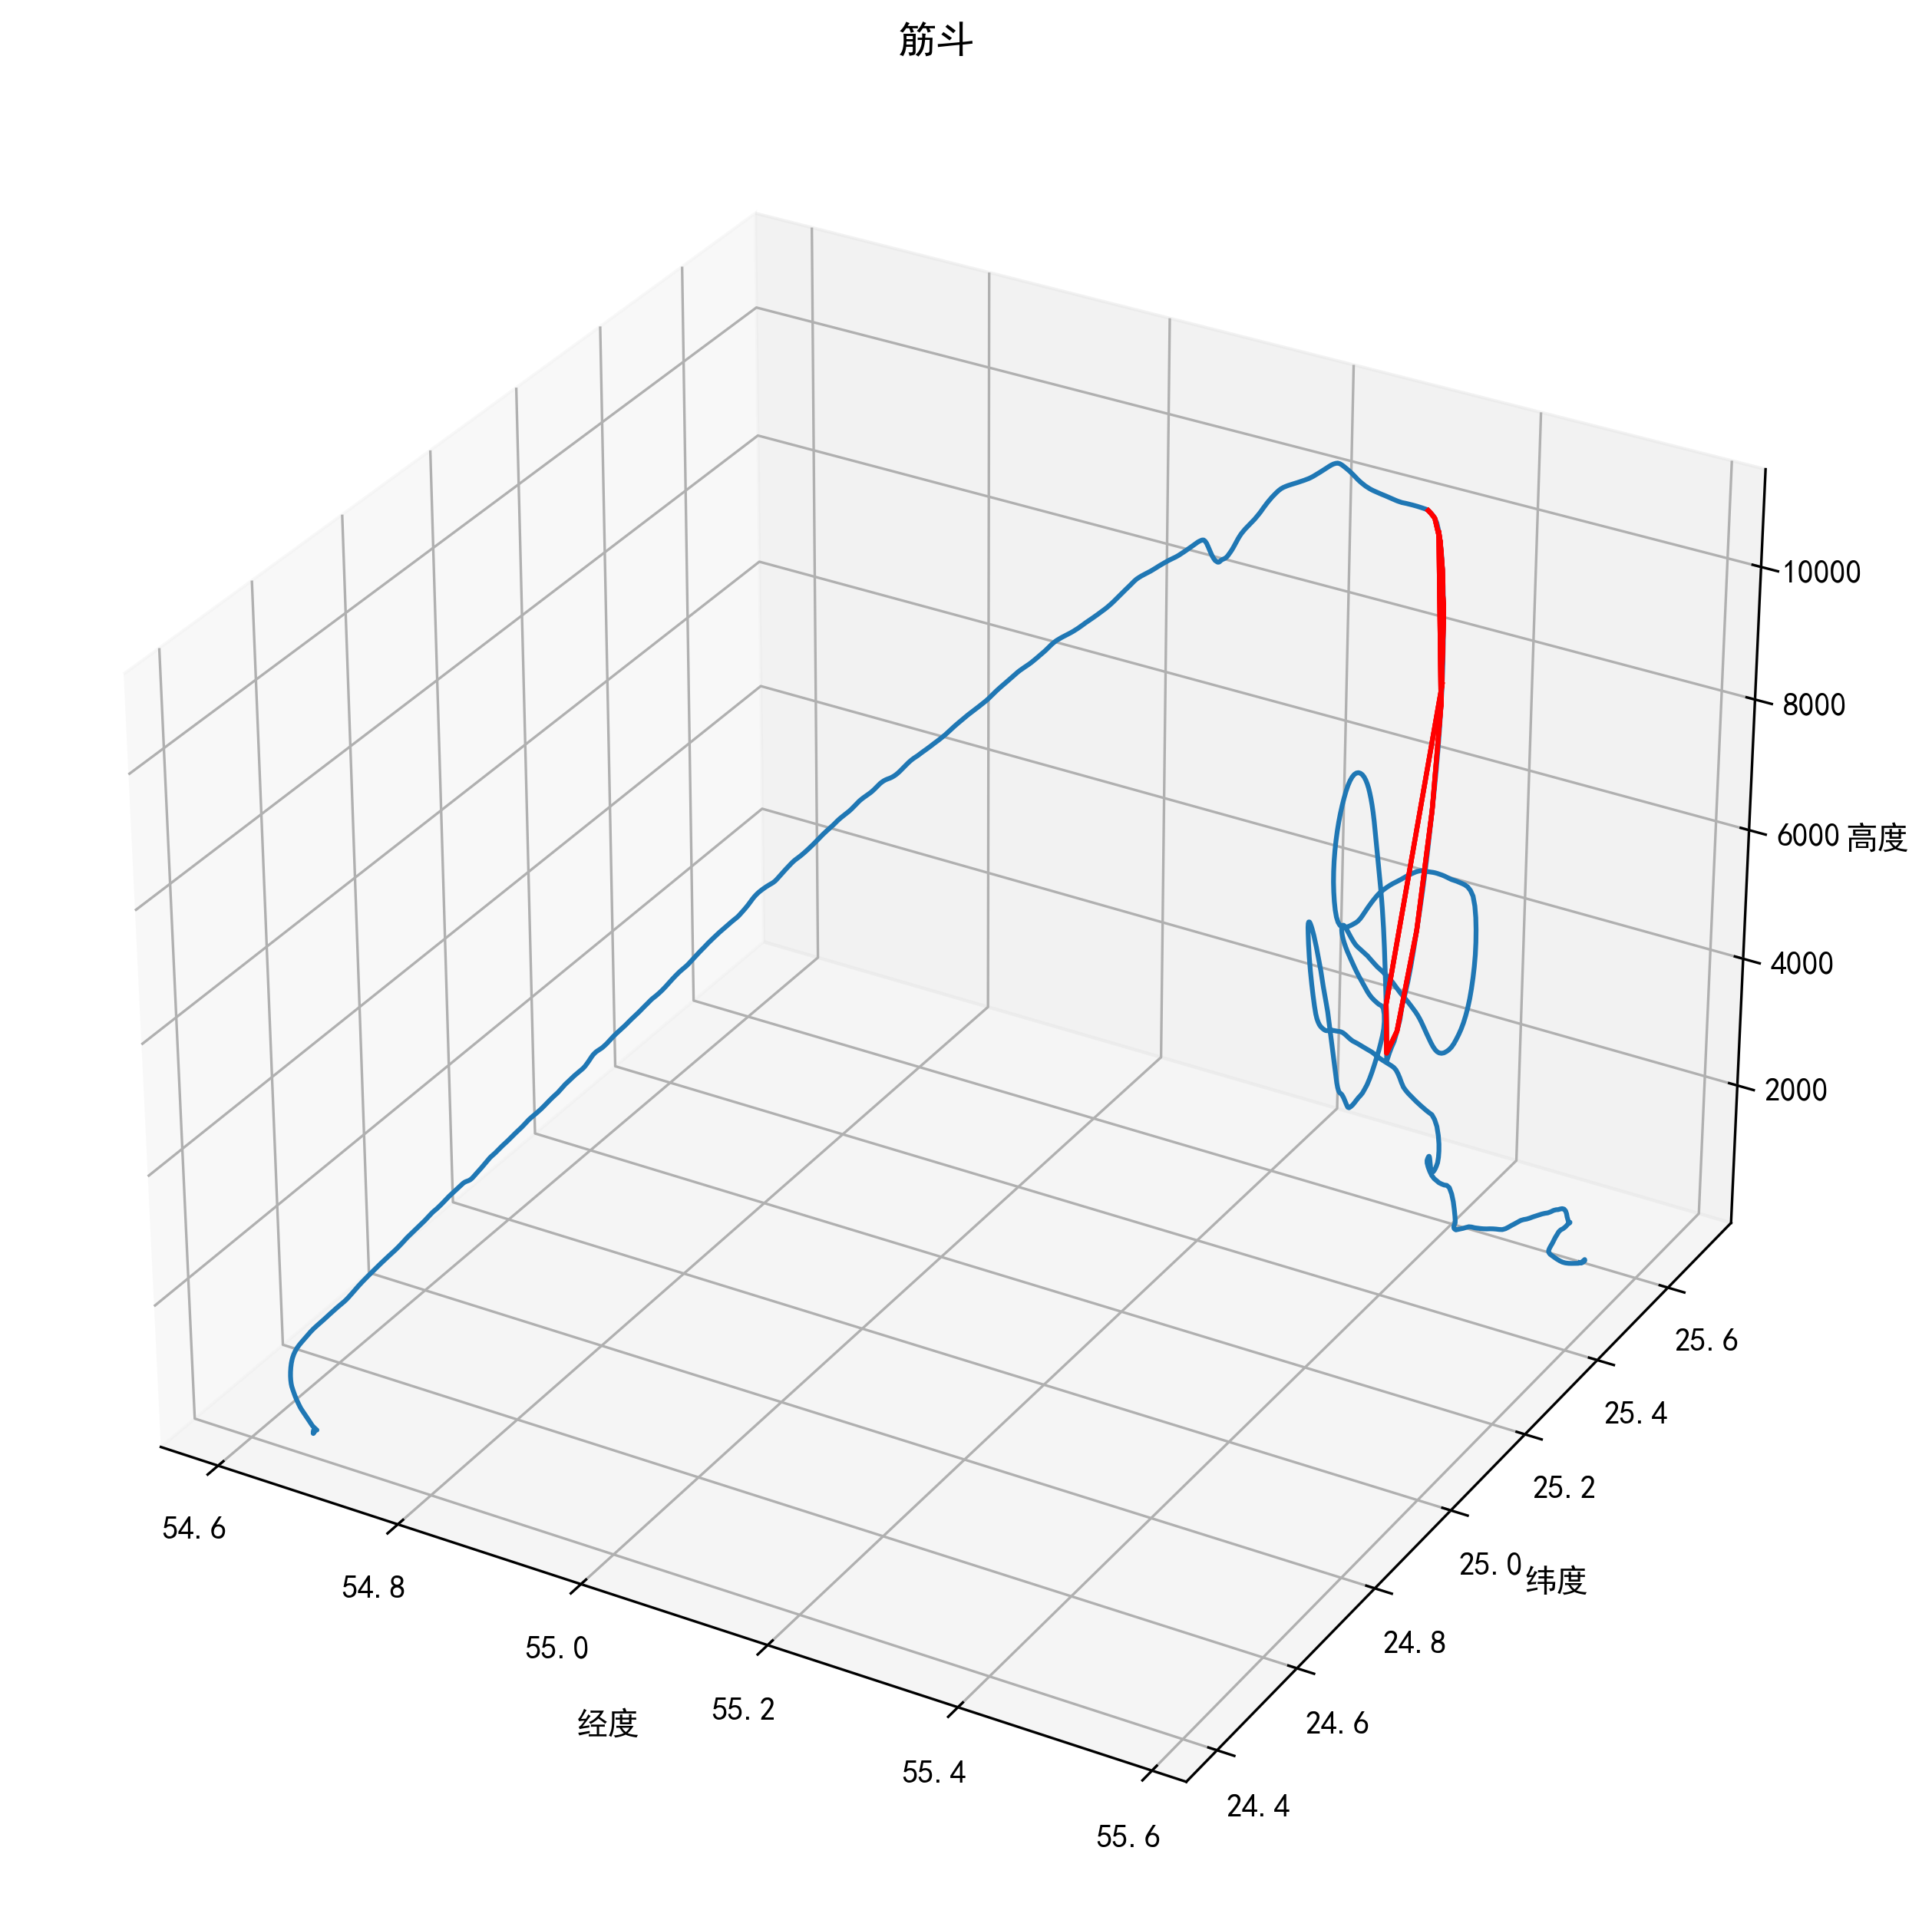

[[55.3275985,
  55.3290048,
  55.3318045,
  55.3358439,
  55.339046,
  55.3389936,
  55.3345959,
  55.3358439,
  55.3378403,
  55.3394069,
  55.3389936,
  55.3341889,
  55.3247184,
  55.3119306,
  55.3087918,
  55.315515,
  55.339482],
 [55.3275985,
  55.3290048,
  55.3318045,
  55.3358439,
  55.339046,
  55.3389936,
  55.3345959,
  55.3358439,
  55.3378403,
  55.3394069,
  55.3389936,
  55.3341889,
  55.3247184,
  55.3119306,
  55.3087918,
  55.315515,
  55.339482],
 [55.3275985,
  55.3290048,
  55.3318045,
  55.3358439,
  55.339046,
  55.3389936,
  55.3345959,
  55.3358439,
  55.3378403,
  55.3394069,
  55.3389936,
  55.3341889,
  55.3247184,
  55.3119306,
  55.3087918,
  55.315515,
  55.339482]]

In [50]:
# 获取经度、维度、高度
longitude = []
latitude = []
altitude = []
for i in range(len(data['Longitude'].to_list())):
    longitude.append(data['Longitude'].to_list()[i])
    latitude.append(data['Latitude'].to_list()[i])
    altitude.append(data['Altitude'].to_list()[i])


longitude1 = []
latitude1 = []
altitude1 = []
for i in range(len(flag)):
    temp_long = []
    temp_lat = []
    temp_alt = []
    for j in range(len(times_[flag[i]])):
        temp_long.append(data.loc[times_[flag[i]][j]]['Longitude'])
        temp_lat.append(data.loc[times_[flag[i]][j]]['Latitude'])
        temp_alt.append(data.loc[times_[flag[i]][j]]['Altitude'])
    longitude1.append(temp_long)
    latitude1.append(temp_lat)
    altitude1.append(temp_alt)




# 绘制三维轨迹图
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(longitude, latitude, altitude)
# 绘制在同一张图上一条红线
for i in range(len(longitude1)):
    ax.plot(longitude1[i], latitude1[i], altitude1[i], color='r')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.set_zlabel('高度')

# 设置DPI为300
fig.set_dpi(300)
# 设置图片大小
fig.set_size_inches(18.5, 10.5)
# 设置标题
plt.title('筋斗')
# 保存图片
plt.savefig('./fig/筋斗.png', dpi=300)
plt.show()
longitude1 
